# Cyber Security In Banking
## Credit Card Fraud Detection



### Import Packages

In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import time
import warnings
warnings.filterwarnings("ignore")



### Read the Train File

In [2]:
train_trans  = pd.read_csv('train_data.csv', index_col = 0, parse_dates = True)
train_id  = pd.read_csv('train_identity.csv', index_col = 0, parse_dates = True)

### Undestanding the data

In [3]:
train_trans.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15
count,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,...,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000
mean,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,118.502180,...,69.805717,41.638950,146.058108,0.561057,123.982137,146.621465,54.037533,17.901295,57.724444,163.744579
std,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,371.872026,...,143.669253,99.743264,231.663840,0.316880,182.615225,186.042622,124.274558,67.614425,136.312450,202.726660
min,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,...,-83.000000,0.000000,0.000000,0.000000,0.000000,-53.000000,-83.000000,0.000000,-193.000000,-83.000000
25%,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,3.000000,...,0.000000,0.000000,0.958333,0.208333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,8.000000,...,0.000000,0.000000,37.875000,0.666666,15.000000,43.000000,0.000000,0.000000,0.000000,52.000000
75%,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,24.000000,...,40.000000,17.000000,187.958328,0.833333,197.000000,274.000000,13.000000,0.000000,2.000000,314.000000
max,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,10286.000000,...,873.000000,843.000000,1707.791626,0.958333,876.000000,670.000000,648.000000,847.000000,878.000000,879.000000


In [4]:
train_id.describe()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,2.789446,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,-100.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,0.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,0.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,0.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [5]:
# Find the type has been inserted in the excel sheet
train_trans.dtypes

isFraud             int64
TransactionDT       int64
TransactionAmt    float64
productcd          object
card1               int64
                   ...   
m5                 object
m6                 object
m7                 object
m8                 object
m9                 object
Length: 80, dtype: object

In [6]:
# Find the type has been inserted in the excel sheet
train_id.dtypes

id_01         float64
id_02         float64
id_03         float64
id_04         float64
id_05         float64
id_06         float64
id_07         float64
id_08         float64
id_09         float64
id_10         float64
id_11         float64
id_12          object
id_13         float64
id_14         float64
id_15          object
id_16          object
id_17         float64
id_18         float64
id_19         float64
id_20         float64
id_21         float64
id_22         float64
id_23          object
id_24         float64
id_25         float64
id_26         float64
id_27          object
id_28          object
id_29          object
id_30          object
id_31          object
id_32         float64
id_33          object
id_34          object
id_35          object
id_36          object
id_37          object
id_38          object
DeviceType     object
DeviceInfo     object
dtype: object

In [7]:
train_trans.columns

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'productcd', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
       'dist2', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'c1', 'c2',
       'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13',
       'c14', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10',
       'd11', 'd12', 'd13', 'd14', 'd15', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6',
       'm7', 'm8', 'm9'],
      dtype='object')

In [8]:
train_trans.shape,train_id.shape

((590540, 80), (144233, 40))

### Cleaning and Pre-processing

In [9]:
def create_col_name(base_str, start_int, end_int):
    return [base_str +str(i) for i in range (start_int, end_int+1)]

In [10]:
create_col_name('card', 1, 6)

['card1', 'card2', 'card3', 'card4', 'card5', 'card6']

In [11]:
cat_cols = (['productcd']+ create_col_name('card',1,6) + ['addr1','addr2'] +
            create_col_name('m',1,9) + ['DeviceType', 'DeviceInfo'] + create_col_name('id_', 12,38))
id_cols = ['TransactionID', 'TransactionDT']

target = 'isFraud'

In [12]:
type_map = {c: str for c in cat_cols + id_cols}

##### Merging both the training data

In [13]:
train = train_trans.merge(train_id, on='TransactionID', how = 'left')

In [14]:
numeric_cols = [col for col in train.columns.tolist() if col not in cat_cols + id_cols + [target]]

In [15]:
assert(train.shape[0]==train_trans.shape[0])
train.head()

,isFraud,TransactionDT,TransactionAmt,productcd,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [16]:
train[numeric_cols].head()

,TransactionAmt,dist1,dist2,v1,v2,v3,v4,v5,v6,v7,...,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,68.5,19.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,59.0,287.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


### Load the Test Data

In [17]:
test_trans  = pd.read_csv('test_data.csv', index_col = 0, parse_dates = True)
test_id  = pd.read_csv('test_identity.csv', index_col = 0, parse_dates = True)

In [18]:
test = test_trans.merge(test_id, on='TransactionID', how = 'left')

In [19]:
test.head()

,TransactionDT,TransactionAmt,productcd,card1,card2,card3,card4,card5,card6,addr1,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Distribution Plot for Transaction amount and data time

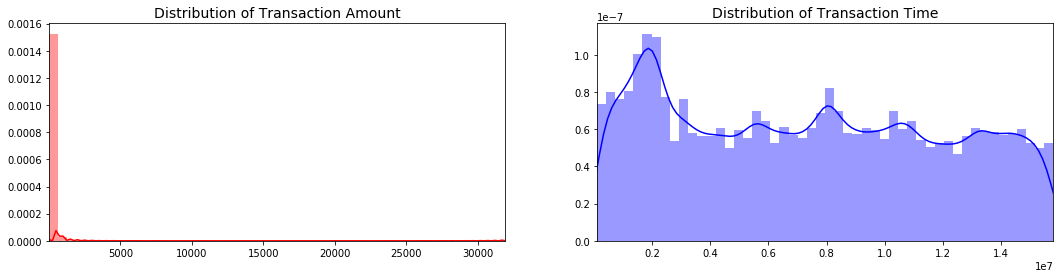

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = train['TransactionAmt'].values
time_val = train['TransactionDT'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

### Clean the numeric data

In [21]:
train['id_30'].unique()[:20]

array([nan, 'Android 7.0', 'iOS 11.1.2', 'Mac OS X 10_11_6', 'Windows 10',
       'Android', 'Linux', 'iOS 11.0.3', 'Mac OS X 10_7_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'iOS 11.1.0',
       'Mac OS X 10_9_5', 'Windows 7', 'Windows 8.1', 'Mac', 'iOS 10.3.3',
       'Mac OS X 10.12', 'Mac OS X 10_10_5', 'Mac OS X 10_11_5'],
      dtype=object)

In [22]:
train['id_30'].unique()[:20]

array([nan, 'Android 7.0', 'iOS 11.1.2', 'Mac OS X 10_11_6', 'Windows 10',
       'Android', 'Linux', 'iOS 11.0.3', 'Mac OS X 10_7_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'iOS 11.1.0',
       'Mac OS X 10_9_5', 'Windows 7', 'Windows 8.1', 'Mac', 'iOS 10.3.3',
       'Mac OS X 10.12', 'Mac OS X 10_10_5', 'Mac OS X 10_11_5'],
      dtype=object)

In [23]:
for col in ['id_30', 'id_31']:
    train[col+'_clean'] =test[col].str.replace(r'[A-za-z]','', regex=True)
    test[col+'_clean'] =test[col].str.replace(r'[A-za-z]','', regex=True)
    cat_cols += [col+'_clean']

In [24]:
# Log Transfor
log_cols = ['TransactionAmt',
            'dist1',
            'dist2',
] + ['c%d' % i for i in range(1,15)]

non_log_cols = [c for c in numeric_cols if c not in log_cols]

In [25]:
for c in log_cols:
    train[c] = train[c].apply(lambda x: np.log10(x+1e-1))
    test[c] = test[c].apply(lambda x: np.log10(x+1e-1))

### Check Whether the data is balance or not

In [26]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(train['isFraud'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('Frauds', round(train['isFraud'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

No Frauds 96.5 % of the dataset
Frauds 3.5 % of the dataset


Text(0.5, 1.0, 'Distribution of Credit Card Transactions')

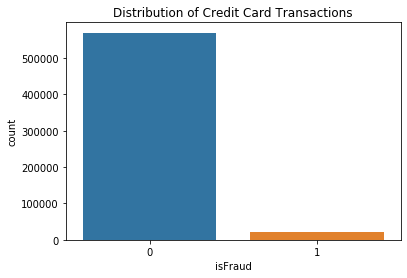

In [27]:
# Plot the histogram to whether the transaction 
colors = ["#0101DF", "#DF0101"]

sns.countplot(train['isFraud'])
plt.title('Distribution of Credit Card Transactions')

### Scaling

In [28]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

def standardize_numeric(train, test, cols):
    ss = StandardScaler()
    train[cols] = ss.fit_transform(train[cols])
    test[cols] = ss.fit_transform(test[cols])
    return train, test

In [29]:
train, test = standardize_numeric(train, test, non_log_cols+log_cols)

In [30]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(train['isFraud'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('Frauds', round(train['isFraud'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

X = train.drop('isFraud', axis=1)
y = train['isFraud']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 96.5 % of the dataset
Frauds 3.5 % of the dataset
Train: [116771 116772 116773 ... 590537 590538 590539] Test: [     0      1      2 ... 154476 154537 154538]
Train: [     0      1      2 ... 590537 590538 590539] Test: [116771 116772 116773 ... 253272 253306 253312]
Train: [     0      1      2 ... 590537 590538 590539] Test: [235448 235449 235450 ... 366784 366796 366821]
Train: [     0      1      2 ... 590537 590538 590539] Test: [353901 353902 353903 ... 472501 472502 472503]
Train: [     0      1      2 ... 472501 472502 472503] Test: [470273 470280 470286 ... 590537 590538 590539]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.96501084 0.03498916]
[0.9650066 0.0349934]


In [31]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

train = train.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_train = train.loc[train['isFraud'] == 1]
non_fraud_train = train.loc[train['isFraud'] == 0][:20663]

normal_distributed_train = pd.concat([fraud_train, non_fraud_train])

# Shuffle dataframe rows
new_train = normal_distributed_train.sample(frac=1, random_state=42)

new_train.head()


,isFraud,TransactionDT,TransactionAmt,productcd,card1,card2,card3,card4,card5,card6,...,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,id_30_clean,id_31_clean
TransactionID,,,,,,,,,,,,,,,,,,,,,
3307108,0,7951429,-0.791381,W,2884,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3464819,1,12371412,-0.619746,C,13832,375.0,185.0,mastercard,224.0,debit,...,NaN,NaN,F,F,T,F,mobile,Hisense E51 Build/LMY47V,NaN,NaN
3519849,1,14048172,-2.600477,C,9633,130.0,185.0,visa,138.0,debit,...,NaN,NaN,F,F,T,F,mobile,SM-G900M Build/LRX21T,NaN,NaN
3515053,0,13893116,1.405470,R,11318,481.0,150.0,mastercard,203.0,credit,...,1920x1080,match_status:2,T,F,T,T,desktop,Trident/7.0,NaN,NaN
3317021,1,8115030,-0.711528,C,9026,545.0,185.0,visa,137.0,credit,...,NaN,NaN,F,T,T,F,desktop,NaN,NaN,NaN


Distribution of the Classes in the subsample dataset
1    0.03499
0    0.03499
Name: isFraud, dtype: float64


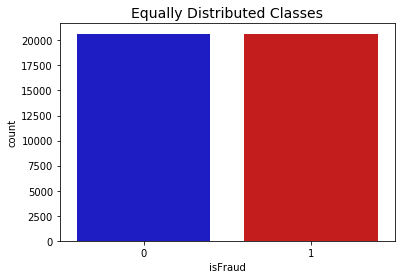

In [32]:
print('Distribution of the Classes in the subsample dataset')
print(new_train['isFraud'].value_counts()/len(train))



sns.countplot('isFraud', data=new_train, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

### After Scaling Fill the null Values With mean

In [33]:
new_train[non_log_cols+log_cols] = new_train[non_log_cols+log_cols].fillna(0)
test[non_log_cols+log_cols] = test[non_log_cols+log_cols].fillna(0)

In [34]:
new_train[log_cols+non_log_cols].head()

,TransactionAmt,dist1,dist2,c1,c2,c3,c4,c5,c6,c7,...,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11
TransactionID,,,,,,,,,,,,,,,,,,,,,
3307108,-0.791381,0.0,0.000000,-0.605667,-0.609052,-0.063449,-0.512765,0.662205,-0.236679,-0.329972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3464819,-0.619746,0.0,-1.240819,2.287521,2.291285,-0.063449,3.217536,-0.667834,1.451284,4.444276,...,0.229716,-0.100613,0.084076,-0.307740,0.406203,0.0,0.0,-0.092519,0.107952,0.225856
3519849,-2.600477,0.0,0.000000,2.227409,2.594390,-0.063449,3.293846,-0.667834,1.523157,4.541940,...,0.762346,-0.100613,0.084076,-0.307740,0.345564,0.0,0.0,-0.092519,0.107952,0.225856
3515053,1.405470,0.0,0.000000,-0.605667,-0.609052,-0.063449,1.425401,-0.667834,-0.236679,-0.329972,...,-0.333048,0.000000,0.000000,0.073224,0.406203,0.0,0.0,0.000000,0.000000,0.225856
3317021,-0.711528,0.0,0.000000,1.740478,2.139171,-0.063449,2.665244,-0.667834,0.931095,3.737421,...,-0.735926,-0.100613,0.084076,-0.307740,0.406203,0.0,0.0,-0.092519,0.107952,0.225856


In [35]:
def fill_na(new_train, test, cat_cols):
    new_train.loc[:,cat_cols] = new_train[cat_cols].fillna('<unknown>')
    test.loc[:,cat_cols] = test[cat_cols].fillna('<unknown>')
    
    return new_train, test


In [36]:
def overwrite_rare(new_train, test, cat_cols, count_threshold=100):
    for col in cat_cols:
        val_counts = new_train[col].value_counts()
        good_cats = val_counts[val_counts>=count_threshold].index.values
        new_train.loc[~new_train[col].isin(good_cats),col] = '<Rare>'
        test.loc[~test[col].isin(good_cats),col] = '<Rare>'

In [37]:
overwrite_rare(new_train, test, cat_cols)

In [38]:
new_train[cat_cols].head()

,productcd,card1,card2,card3,card4,card5,card6,addr1,addr2,m1,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,id_30_clean,id_31_clean
TransactionID,,,,,,,,,,,,,,,,,,,,,
3307108,W,2884,490,150,visa,226,debit,315,87,True,...,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>
3464819,C,13832,375,185,mastercard,224,debit,<Rare>,<Rare>,<Rare>,...,<Rare>,<Rare>,<Rare>,<Rare>,F,F,T,F,<Rare>,<Rare>
3519849,C,9633,130,185,visa,138,debit,<Rare>,<Rare>,<Rare>,...,chrome 66.0 for android,<Rare>,<Rare>,<Rare>,F,F,T,F,<Rare>,<Rare>
3515053,R,<Rare>,481,150,mastercard,<Rare>,credit,204,87,<Rare>,...,ie 11.0 for desktop,24,1920x1080,match_status:2,T,F,T,T,<Rare>,<Rare>
3317021,C,9026,545,185,visa,137,credit,<Rare>,<Rare>,<Rare>,...,firefox,<Rare>,<Rare>,<Rare>,F,T,T,F,<Rare>,<Rare>


### Encoded Categories with Integer

In [39]:
plt.rcParams['figure.figsize'] = (8,8)
pd.set_option('display.max_columns', 500)

In [40]:
from pandas.api.types import CategoricalDtype
def cat_to_int(new_train, test, col):
    catDtype = CategoricalDtype(categories=new_train[col].value_counts().index.values)
    return new_train[col].astype(catDtype).cat.codes.values, test[col].astype(catDtype).cat.codes.values

In [41]:
new_train.loc[:,cat_cols] = new_train[cat_cols].fillna('<UNK>')
test.loc[:,cat_cols] = test[cat_cols].fillna('<UNK>')

new_train = new_train.fillna(-999)
test = test.fillna(-999)

In [42]:
cat_cols_encoded = list()
for col in cat_cols:
    new_train[col+'_code'], test[col+'_code'] = cat_to_int(new_train, test, col)
    cat_cols_encoded.append(col+'_code')

In [43]:

def cat_to_int(new_train, test, col):
    catDtype = CategoricalDtype(categories=new_train[col].value_counts().index.values)
    return (new_train[col].astype(catDtype).cat.codes.values+1,
            test[col].astype(catDtype).cat.codes.values+1)

In [44]:
max_idx_map = (new_train[cat_cols_encoded].max()+1).to_dict()

In [45]:
embed_dim_map = {k: (v, int(v**0.25)) for k, v in max_idx_map.items()}

In [46]:
embed_dim_map

{'productcd_code': (5, 1),
 'card1_code': (73, 2),
 'card2_code': (60, 2),
 'card3_code': (4, 1),
 'card4_code': (5, 1),
 'card5_code': (15, 1),
 'card6_code': (3, 1),
 'addr1_code': (45, 2),
 'addr2_code': (4, 1),
 'm1_code': (2, 1),
 'm2_code': (3, 1),
 'm3_code': (3, 1),
 'm4_code': (4, 1),
 'm5_code': (3, 1),
 'm6_code': (3, 1),
 'm7_code': (3, 1),
 'm8_code': (3, 1),
 'm9_code': (3, 1),
 'DeviceType_code': (3, 1),
 'DeviceInfo_code': (9, 1),
 'id_12_code': (3, 1),
 'id_13_code': (13, 1),
 'id_14_code': (5, 1),
 'id_15_code': (4, 1),
 'id_16_code': (3, 1),
 'id_17_code': (4, 1),
 'id_18_code': (4, 1),
 'id_19_code': (29, 2),
 'id_20_code': (32, 2),
 'id_21_code': (2, 1),
 'id_22_code': (2, 1),
 'id_23_code': (3, 1),
 'id_24_code': (3, 1),
 'id_25_code': (2, 1),
 'id_26_code': (2, 1),
 'id_27_code': (2, 1),
 'id_28_code': (3, 1),
 'id_29_code': (3, 1),
 'id_30_code': (18, 2),
 'id_31_code': (24, 2),
 'id_32_code': (3, 1),
 'id_33_code': (14, 1),
 'id_34_code': (3, 1),
 'id_35_code':

### Modeling

In [47]:
# Remove the unecessary column
new_train = new_train.drop(['productcd','card4','card6','m1','m2','m3','m4','m5','m6','m7','m8','m9'
],axis=1)
new_train.head()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,id_30_clean,id_31_clean,productcd_code,card1_code,card2_code,card3_code,card4_code,card5_code,card6_code,addr1_code,addr2_code,m1_code,m2_code,m3_code,m4_code,m5_code,m6_code,m7_code,m8_code,m9_code,DeviceType_code,DeviceInfo_code,id_12_code,id_13_code,id_14_code,id_15_code,id_16_code,id_17_code,id_18_code,id_19_code,id_20_code,id_21_code,id_22_code,id_23_code,id_24_code,id_25_code,id_26_code,id_27_code,id_28_code,id_29_code,id_30_code,id_31_code,id_32_code,id_33_code,id_34_code,id_35_code,id_36_code,id_37_code,id_38_code,id_30_clean_code,id_31_clean_code
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3307108,0,7951429,-0.791381,2884,490,150,226,315,87,0.0,0.000000,0.007391,-0.188248,-0.243307,0.348922,0.258476,-0.190849,-0.239092,-0.148892,-0.183482,1.027925,0.94313,0.862411,0.753187,0.022356,-0.368033,-0.360108,-0.367780,-0.364112,0.431549,0.331173,-0.382481,-0.368077,-0.140469,-0.190180,0.120595,0.057142,-0.027121,-0.02666,-0.605667,-0.609052,-0.063449,-0.512765,0.662205,-0.236679,-0.329972,-0.519224,0.188563,-0.503527,-0.469876,-0.421123,-0.692291,-0.343615,-0.598423,0.000,0.000000,-0.732627,0.000000,0.000000,0.000000,0.000000,0.000000,-0.678926,-0.788108,0.000000,0.000000,0.000000,-0.807712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,0,34,4,0,0,0,0,8,0,1,1,1,0,0,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3464819,1,12371412,-0.619746,13832,375,185,224,<Rare>,<Rare>,0.0,-1.240819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1.096328,-1.125861,0.022356,2.640196,2.556698,2.376034,2.325774,0.431549,0.331173,2.566855,2.414226,3.896993,3.083306,0.120595,0.057142,-0.027121,-0.02666,2.287521,2.291285,-0.063449,3.217536,-0.667834,1.451284,4.444276,2.911089,-1.260386,3.583234,0.775614,2.870479,-0.339236,0.167225,-0.585738,-0.945,-0.422273,-0.732627,-0.475685,-0.485881,-0.417467,-0.629759,-1.244617,-0.678926,0.000000,-0.434827,-0.264758,-0.423475,-0.457486,0.360366,0.229716,-0.100613,0.084076,-0.307740,0.406203,0.0,0.0,-0.092519,0.107952,0.225856,NotFound,64,<Rare>,Found,Found,225,<Rare>,266,325,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,Found,Found,<Rare>,<Rare>,<Rare>,<Rare>,<Rare>,F,F,T,F,mobile,<Rare>,<Rare>,<Rare>,1,23,15,1,1,1,0,0,1,0,0,0,2,0,0,0,0,0,2,0,1,3,0,1,1,1,0,1,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0
3519849,1,14048172,-2.600477,9633,130,185,138,<Rare>,<Rare>,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1.096328,-1.125861,0.022356,2.640196,2.556698,2.376034,2.325774,0.431549,0.331173,2.566855,2.414226,3.896993,3.083306,0.120595,0.057142,-0.027121,-0.02666,2.227409,2.594390,-0.063449,3.293846,-0.667834,1.523157,4.541940,3.513709,-1.260386,2.635599,2.490838,4.476477,0.026060,0.474905,-0.598423,0.000,0.000000,-0.732627,-0.475685,-0.485881,-0.417467,-0.627961,0.070298,-0.678926,0.000000,-0.434827,-0.264758,-0.144701,-0.807712,0.360366,0.762346,-0.100613,0.084076,-0.307740,0.345564,0.0,0.0,-0.092519,0.107952,0.225856,NotFound,64,<Rare>,Found,Found,225,<Rare>,176,5

In [48]:
# Undersampling before cross validating (prone to overfit)
X = new_train.drop('isFraud', axis=1)
y = new_train['isFraud']

In [49]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train.shape, X_test.shape

((33060, 158), (8266, 158))

In [51]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [52]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [53]:
X_train.shape, X_test.shape

((33060, 158, 1), (8266, 158, 1))

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.0.0-rc0


In [62]:
epochs = 30
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

InternalError: cudaGetDevice() failed. Status: cudaGetErrorString symbol not found.

In [58]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [59]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [60]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

InternalError: cudaGetDevice() failed. Status: cudaGetErrorString symbol not found.

In [57]:

epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

InternalError: cudaGetDevice() failed. Status: cudaGetErrorString symbol not found.